In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data into Data Frame

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Review missing value count and percentage (see only columns with missing values)

null_col = pd.DataFrame(leads.isnull().sum()).reset_index()
null_col.columns=['col','null_count']
null_col['percentage'] = 100*(null_col['null_count']/leads.shape[0])
null_col = null_col[null_col['null_count']>0]
null_col.sort_values('percentage', ascending=False)

,col,null_count,percentage
25,Lead Quality,4767,51.590909
33,Asymmetrique Profile Score,4218,45.649351
32,Asymmetrique Activity Score,4218,45.649351
31,Asymmetrique Profile Index,4218,45.649351
30,Asymmetrique Activity Index,4218,45.649351
24,Tags,3353,36.287879
28,Lead Profile,2709,29.318182
15,What matters most to you in choosing a course,2709,29.318182
14,What is your current occupation,2690,29.112554
11,Country,2461,26.634199


In [8]:
# Drop columns with more than 3000 (35%) missing values

col_drop = null_col[null_col['null_count']>3000]['col']
leads.drop(columns=col_drop, inplace=True)

In [9]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened


In [10]:
# Drop columns which are in-significant for prediction

leads.drop(columns=['Prospect ID','Lead Number', 'City', 'Country'], inplace=True)

In [11]:
# Check for the remainig missig values

null_col = pd.DataFrame(leads.isnull().sum()).reset_index()
null_col.columns=['col','null_count']
null_col['percentage'] = 100*(null_col['null_count']/leads.shape[0])
null_col = null_col[null_col['null_count']>0]
null_col.sort_values('percentage', ascending=False)

,col,null_count,percentage
12,What matters most to you in choosing a course,2709,29.318182
23,Lead Profile,2709,29.318182
11,What is your current occupation,2690,29.112554
10,How did you hear about X Education,2207,23.885281
9,Specialization,1438,15.562771
5,TotalVisits,137,1.482684
7,Page Views Per Visit,137,1.482684
8,Last Activity,103,1.114719
1,Lead Source,36,0.389610


In [12]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- No variation / variance in 'What matters most to you in choosing a course' column values. So, drop it.

In [13]:
leads.drop(columns='What matters most to you in choosing a course', inplace=True)

In [14]:
print(leads['Lead Profile'].value_counts())
leads['Lead Profile'].value_counts()['Select']/leads.shape[0]*100

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


44.87012987012987

- Lead Profile column has 30% missing values, and 45% values are select (no user input). Drop this column.

In [15]:
leads.drop(columns='Lead Profile', inplace=True)

In [16]:
print(leads['How did you hear about X Education'].value_counts())
leads['How did you hear about X Education'].value_counts()['Select']/leads.shape[0]*100

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


54.57792207792208

- 'How did you hear about X Education' column has 30% missing values, and 55% values are select (no user input). Drop this column.

In [17]:
leads.drop(columns='How did you hear about X Education', inplace=True)

In [18]:
print(leads['What is your current occupation'].value_counts())

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [19]:
# Drop rows with missing value in What is your current occupation column

leads = leads[~leads['What is your current occupation'].isnull()]

In [20]:
# Drop rows with missing value in TotalVisits column

leads = leads[~leads['TotalVisits'].isnull()]

In [21]:
# Drop rows with missing value in Lead Source column

leads = leads[~leads['Lead Source'].isnull()]

In [22]:
# Drop rows with missing value in Specialization column

leads = leads[~leads['Specialization'].isnull()]

No Missing Values remaining

In [23]:
leads.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [24]:
# Review categorical column values

for col in leads.columns:
    print(leads[col].value_counts())
    print("=======================================")

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Pay per Click Ads       1
testone                 1
Press_Release           1
WeLearn                 1
Name: Lead Source, dtype: int64
No     5938
Yes     435
Name: Do Not Email, dtype: int64
No     6371
Yes       2
Name: Do Not Call, dtype: int64
0    3308
1    3065
Name: Converted, dtype: int64
0.0      1347
2.0      1225
3.0       937
4.0       823
5.0       578
6.0       337
1.0       260
7.0       225
8.0       162
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0 

#### - Below columns have miniscual or no variation (Imbalance data). Drop these columns
Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque.


In [25]:
leads.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                    'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                    'Update me on Supply Chain Content', 'Get updates on DM Content', 
                    'I agree to pay the amount through cheque'], inplace=True)

In [26]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened


### EDA

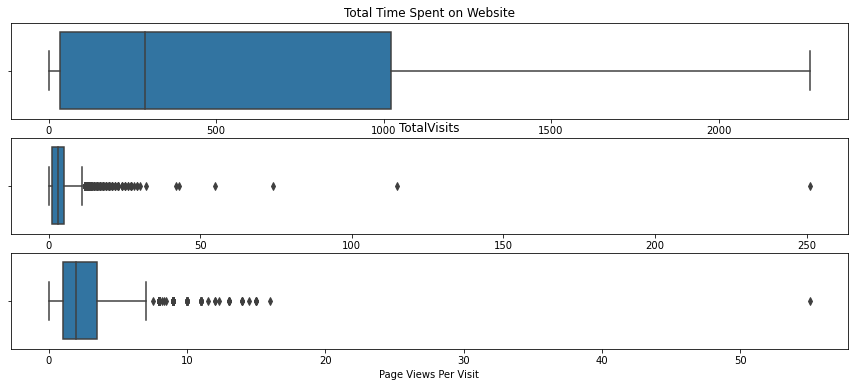

In [27]:
plt.gcf().set_size_inches(15,6)
plt.subplot(3,1,1)
sns.boxplot(leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.subplot(3,1,2)
sns.boxplot(leads['TotalVisits'])
plt.title('TotalVisits')
plt.subplot(3,1,3)
sns.boxplot(leads['Page Views Per Visit'])

plt.show()

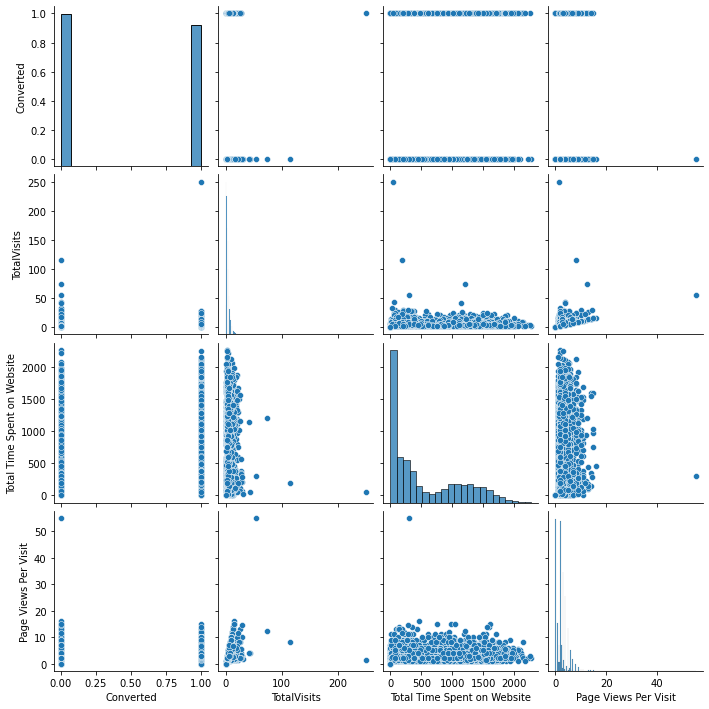

In [28]:
sns.pairplot(leads)

In [29]:
df_0 = leads[leads['Converted']==1]
df_1 = leads[leads['Converted']==0]

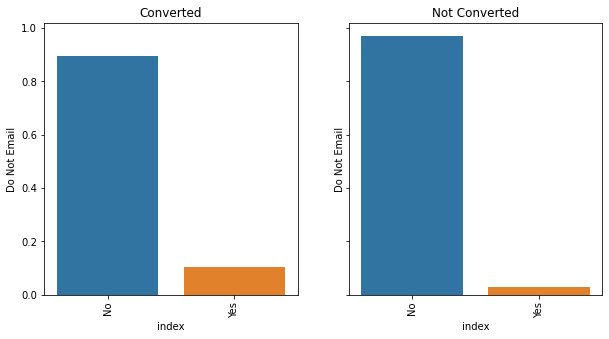

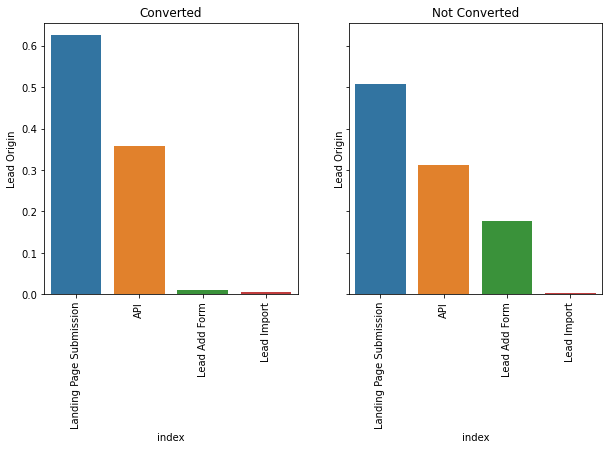

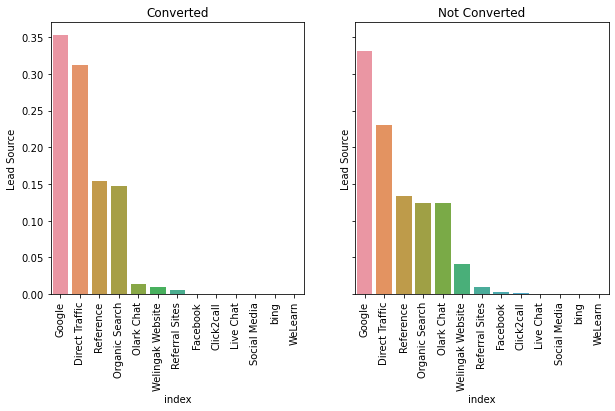

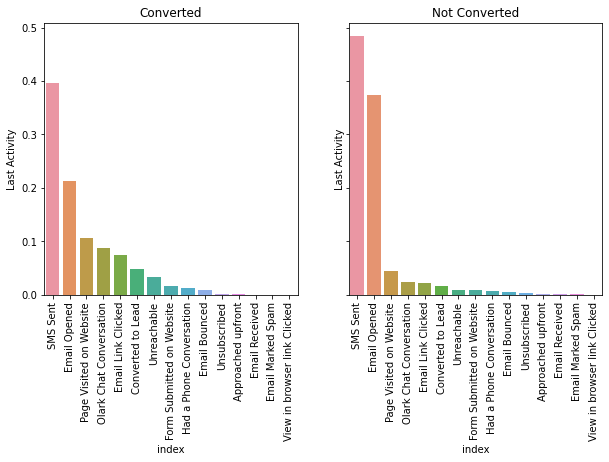

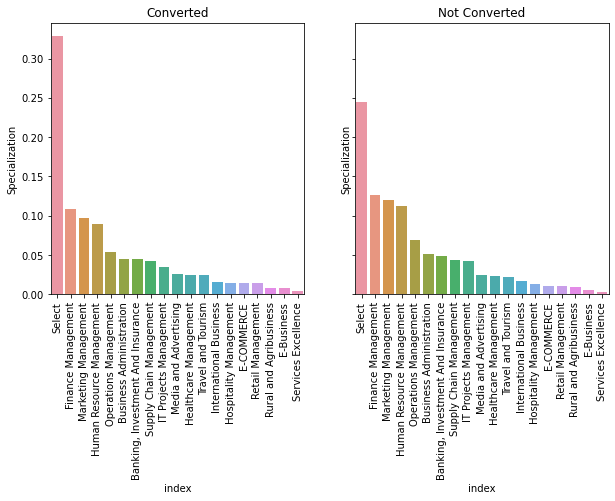

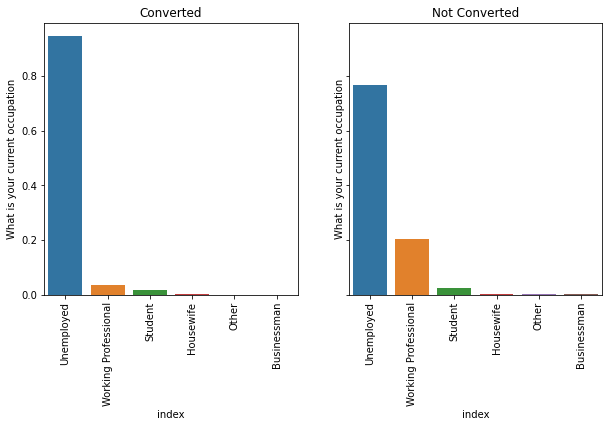

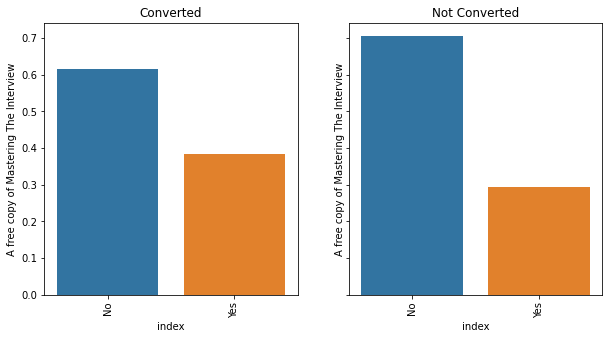

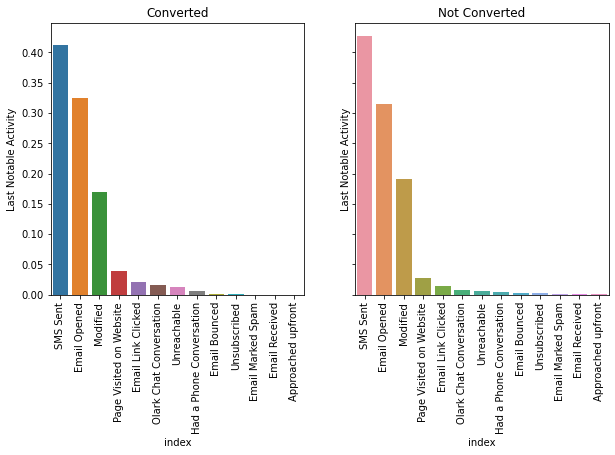

In [30]:
cat_col = ['Do Not Email','Lead Origin','Lead Source','Last Activity','Specialization',
           'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']

for col in cat_col:
    fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1, sharey=True, sharex=True)

    sns.barplot(x='index', y=col, data=df_1[col].value_counts(normalize=True).reset_index(), ax=ax1)
    ax1.set_title('Converted')
    ax1.tick_params(axis='x', rotation=90)
    
    sns.barplot(x='index', y=col, data=df_0[col].value_counts(normalize=True).reset_index(), ax=ax2)
    ax2.set_title('Not Converted')
    ax2.tick_params(axis='x', rotation=90)

    fig.set_size_inches(10,5)
    plt.show()

#### Create Dummy variables

In [31]:
# Convert Yes/No column values to 0 and 1

leads['Do Not Email'] = leads['Do Not Email'].map({'Yes':1, 'No':0})
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [32]:
# Create dummies for categorical variables

category_col = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
               'Last Notable Activity']
dummies = pd.get_dummies(leads[category_col])

In [33]:
# Drop those dummy columns with in-significant business interest rather than drop first

dummies.drop(columns=['Lead Origin_Lead Import', 'Lead Source_Press_Release', 'Last Activity_Visited Booth in Tradeshow',
                     'Specialization_Select', 'What is your current occupation_Businessman', 
                      'Last Notable Activity_View in browser link Clicked'], inplace=True)

In [34]:
# drop original categorical variables converted to dummy variables
leads.drop(columns=category_col, inplace=True)

In [35]:
# Merge dummy variables into original data frame

leads = pd.concat((leads,dummies), axis=1)


#### Model Building

In [36]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [37]:
# Define X, y variables

X = leads.drop('Converted', axis=1)
y = leads['Converted']

In [38]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [39]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.0,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.068370,3.646492,532.615109,2.457664,0.337368,0.337592,0.564672,0.094149,0.000224,0.290069,...,0.0,0.322349,0.0,0.002242,0.305089,0.011432,0.033849,0.288725,0.003587,0.005380
std,0.252409,5.449720,564.859547,2.046555,0.472865,0.472942,0.495856,0.292069,0.014972,0.453845,...,0.0,0.467428,0.0,0.047298,0.460497,0.106321,0.180860,0.453220,0.059788,0.073159
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,285.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,1019.000000,3.670000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,251.000000,2272.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Scale the continuous variables

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                  'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
8003,0,0.064874,-0.824395,-0.223652,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
218,0,0.064874,-0.611929,0.753710,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4171,0,0.431907,-0.804919,1.731071,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4037,0,-0.669191,-0.943022,-1.201013,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3660,0,-0.669191,-0.943022,-1.201013,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Check correlation among features
leads.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Do Not Email,1.000000,-0.148451,0.028900,-0.054778,0.036723,0.052271,-0.065966,0.081123,-0.027360,-0.006783,...,0.065462,-0.180244,-0.003391,-0.012237,0.077136,-0.006807,0.050062,-0.003515,-0.015930,0.258311
Converted,-0.148451,1.000000,0.005651,0.313338,-0.063362,-0.094833,-0.050008,-0.117563,0.288666,0.013496,...,0.018407,-0.010199,0.013015,0.046969,-0.239572,-0.039205,-0.032219,0.284301,0.050436,-0.026673
TotalVisits,0.028900,0.005651,1.000000,0.202551,0.489039,0.186583,-0.148073,0.267954,-0.208375,0.003107,...,0.001319,0.026851,0.005896,0.026100,-0.088690,-0.004994,0.226728,-0.028923,0.002792,0.001631
Total Time Spent on Website,-0.054778,0.313338,0.202551,1.000000,0.303870,0.154256,-0.128501,0.275606,-0.249493,-0.001163,...,0.012137,0.020082,0.005003,0.024632,-0.107230,-0.009837,0.035147,0.082950,0.010331,0.001504
Page Views Per Visit,0.036723,-0.063362,0.489039,0.303870,1.000000,0.251474,-0.264076,0.458168,-0.340185,-0.014229,...,-0.009365,0.048724,0.003003,0.015492,-0.075318,-0.042338,0.017507,0.031327,0.015233,0.028551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Olark Chat Conversation,-0.006807,-0.039205,-0.004994,-0.009837,-0.042338,-0.030165,0.099415,-0.085315,-0.014707,-0.002753,...,-0.001946,-0.075326,-0.001376,-0.004967,-0.072865,1.000000,-0.020429,-0.070769,-0.006466,-0.007681
Last Notable Activity_Page Visited on Website,0.050062,-0.032219,0.226728,0.035147,0.017507,0.054231,-0.041636,0.050847,-0.016433,0.030198,...,-0.003295,-0.127499,-0.002329,-0.008407,-0.123332,-0.020429,1.000000,-0.119786,-0.010944,-0.013001
Last Notable Activity_SMS Sent,-0.003515,0.284301,-0.028923,0.082950,0.031327,0.003137,-0.072685,0.020810,0.091734,-0.016144,...,-0.011413,-0.441685,-0.008070,-0.029124,-0.427251,-0.070769,-0.119786,1.000000,-0.037914,-0.045037
Last Notable Activity_Unreachable,-0.015930,0.050436,0.002792,0.010331,0.015233,-0.008436,0.009135,-0.013579,0.009242,-0.001475,...,-0.001043,-0.040355,-0.000737,-0.002661,-0.039036,-0.006466,-0.010944,-0.037914,1.000000,-0.004115


#### Running first training model

In [42]:
# Logistic regression model with all features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4392
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 08 Sep 2021   Deviance:                          nan
Time:                        20:36:04   Pearson chi2:                 5.67e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -8.358e+15   9.54e+07  -8.76e+07      0.000   -8.36e+15   -8.36e+15
Do Not Email                                         -4.518e+14   5.42e+06  -8.33e+07      0.000   -4.52e+14   -4.52e+14
TotalVisits                                           8.513e+13   1.17e+06   7.26e+07      0.000    8.51e+13    8.51e+13
Total Time Spent on Website                           5.503e+14   1.16e+06   4.74e+08      0.000     5.5e+14     5.5e+14
Page Views Per Visit                                 -1.321e+14   1.48e+06  -8.94e+07      0.000   -1.32e+14   -1.32e+14
A free copy of Mastering The Interview               -5.546e+13   3.09e+06  -1.79e+07      0.000   -5.55e+13   -5.55e+13
Lead Origin_API                                       -4.61e+15   3.59e+07  -1.28e+08      0.000   -4.61e+15   -4.61e+15
Lead Origin_Landing Page Submission                  -4.389e+15    3.6e+07  -1.22e+08      0.000   -4.39e+15   -4.39e+15
Lead Origin_Lead Add Form                             -3.19e+14   5.16e+07  -6.18e+06      0.000   -3.19e+14   -3.19e+14
Lead Source_Click2call                               -4.391e+15   1.07e+08   -4.1e+07      0.000   -4.39e+15   -4.39e+15
Lead Source_Direct Traffic                            4.289e+15   6.77e+07   6.33e+07      0.000    4.29e+15    4.29e+15
Lead Source_Facebook                                  9.595e+14    4.9e+07   1.96e+07      0.000    9.59e+14    9.59e+14
Lead Source_Google                                    4.146e+15   6.77e+07   6.12e+07      0.000    4.15e+15    4.15e+15
Lead Source_Live Chat                                 5.461e+15   9.58e+07    5.7e+07      0.000    5.46e+15    5.46e+15
Lead Source_Olark Chat                                4.644e+15   6.79e+07   6.84e+07      0.000    4.64e+15    4.64e+15
Lead Source_Organic Search                            4.243e+15   6.77e+07   6.26e+07      0.000    4.24e+15    4.24e+15
Lead Source_Pay per Click Ads                         4.972e+14   9.55e+07   5.21e+06      0.000    4.97e+14    4.97e+14
Lead Source_Reference                                 1.758e+15   8.33e+07   2.11e+07      0.000    1.76e+15    1.76e+15
Lead Source_Referral Sites                            5.047e+15   6.84e+07   7.38e+07      0.000    5.05e+15    5.05e+15
Lead Source_Social Media                              -165.6319   2.34e-06  -7.09e+07      0.000    -165.632    -165.632
Lead Source_WeLearn                                   8.794e+15   9.55e+07   9.21e+07      0.000    8.79e+15    8.79e+15
Lead Source_Welingak Website                          2.488e+15   8.34e+07   2.98e+07      0.000    2.49e+15    2.49e+15
Lead Source_bing                                      9.76

#### RFE

In [43]:
# running RFE with 15 variables as output

logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [44]:
# Review RFE results

pd.set_option("display.max_rows", 101)
rfe_df = pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_), columns=['column','selected','rank'])
rfe_df.sort_values('rank')

,column,selected,rank
0,Do Not Email,True,1
20,Lead Source_Welingak Website,True,1
13,Lead Source_Olark Chat,True,1
59,What is your current occupation_Unemployed,True,1
58,What is your current occupation_Student,True,1
56,What is your current occupation_Housewife,True,1
60,What is your current occupation_Working Profes...,True,1
34,Last Activity_SMS Sent,True,1
31,Last Activity_Had a Phone Conversation,True,1
6,Lead Origin_Landing Page Submission,True,1


In [45]:
# Select columns from RFE output

col = X_train.columns[rfe.support_]

In [46]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.0
Date:                Wed, 08 Sep 2021   Deviance:                       4162.0
Time:                        20:36:13   Pearson chi2:                 4.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3133      0.828      1.586      0.113      -0.309       2.936
Do Not Email                                            -1.4367      0.192     -7.481      0.000      -1.813      -1.060
Total Time Spent on Website                              1.1114      0.046     24.126      0.000       1.021       1.202
Lead Origin_API                                         -0.7607      0.584     -1.302      0.193      -1.906       0.384
Lead Origin_Landing Page Submission                     -0.9943      0.581     -1.712      0.087      -2.133       0.144
Lead Origin_Lead Add Form                                3.0825      0.625      4.930      0.000       1.857       4.308
Lead Source_Olark Chat                                   1.1112      0.132      8.390      0.000       0.852       1.371
Lead Source_Welingak Website                             2.1533      1.037      2.077      0.038       0.122       4.185
Last Activity_Had a Phone Conversation                   1.0120      0.981      1.031      0.302      -0.911       2.935
Last Activity_SMS Sent                                   1.1793      0.082     14.324      0.000       1.018       1.341
What is your current occupation_Housewife               22.4916   2.44e+04      0.001      0.999   -4.79e+04    4.79e+04
What is your current occupation_Student                 -1.3029      0.629     -2.070      0.038      -2.537      -0.069
What is your current occupation_Unemployed              -1.4874      0.594     -2.505      0.012      -2.651      -0.324
What is your current occupation_Working Professional     1.1309      0.622      1.817      0.069      -0.089       2.351
Last Notable Activity_Had a Phone Conversation          23.4050   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.7666      0.806      3.434      0.001       1.187       4.346
========================================================================================================================
"""

In [47]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [48]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
8003,0,0.287943
218,0,0.136047
4171,1,0.112744
4037,1,0.294903
3660,1,0.954330


### Finding Optimal Cutoff Point

In [49]:
# Create columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.4,0.41,0.415,0.42,0.425,0.427,0.43,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.41,0.415,0.42,...,0.427,0.43,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9
8003,0,0.287943,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0.136047,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,1,0.112744,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,1,0.294903,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,1,0.954330,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [50]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'precision'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision]
print(cutoff_df)

        prob  accuracy     sensi     speci  precision
0.000  0.000  0.481731  1.000000  0.000000   0.481731
0.100  0.100  0.522080  0.997673  0.080017   0.501990
0.200  0.200  0.697601  0.944160  0.468426   0.622775
0.300  0.300  0.769110  0.865984  0.679066   0.714944
0.400  0.400  0.793320  0.806887  0.780709   0.773762
0.410  0.410  0.792423  0.797580  0.787630   0.777324
0.415  0.415  0.790406  0.790600  0.790225   0.777930
0.420  0.420  0.789957  0.786412  0.793253   0.779520
0.425  0.425  0.789957  0.782690  0.796713   0.781599
0.427  0.427  0.789733  0.782224  0.796713   0.781497
0.430  0.430  0.789509  0.780363  0.798010   0.782183
0.440  0.440  0.789285  0.771987  0.805363   0.786629
0.460  0.460  0.786819  0.758492  0.813149   0.790495
0.480  0.480  0.786371  0.746394  0.823529   0.797217
0.500  0.500  0.785922  0.731968  0.836073   0.805840
0.600  0.600  0.753867  0.619358  0.878893   0.826195
0.700  0.700  0.737279  0.545370  0.915657   0.857352
0.800  0.800  0.713517  0.45

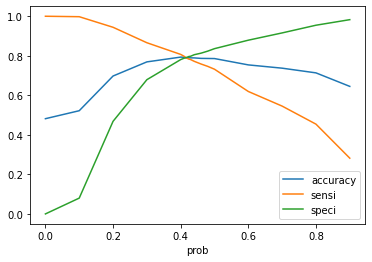

In [51]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.415 is the optimum point to take it as a cutoff probability.

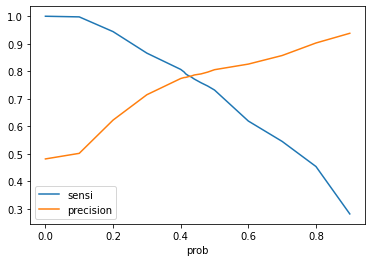

In [52]:
# Plot other evaluation metric pair: precision and recall.
cutoff_df.plot.line(x='prob', y=['sensi','precision'])
plt.show()

#### 

In [53]:
# Check Accuracy at 0.415 cut-off
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

In [54]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.415 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.41,0.415,0.42,...,0.43,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9,predicted
8003,0,0.287943,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0.136047,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,1,0.112744,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,1,0.294903,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,1,0.954330,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [55]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.790405738623627


#### Checking VIFs

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,117.84
3,Lead Origin_Landing Page Submission,77.67
2,Lead Origin_API,47.36
12,What is your current occupation_Working Profes...,15.11
4,Lead Origin_Lead Add Form,14.11
10,What is your current occupation_Student,4.95
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
5,Lead Source_Olark Chat,1.89
8,Last Activity_SMS Sent,1.59


In [58]:
# Drop Lead Origin_API column as VIF (47.36) is high and high P-Values(0.193)
col = col.drop('Lead Origin_API')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.8
Date:                Wed, 08 Sep 2021   Deviance:                       4163.6
Time:                        20:36:14   Pearson chi2:                 4.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5630      0.595      0.947      0.344      -0.603       1.729
Do Not Email                                            -1.4380      0.192     -7.492      0.000      -1.814      -1.062
Total Time Spent on Website                              1.1066      0.046     24.133      0.000       1.017       1.196
Lead Origin_Landing Page Submission                     -0.2465      0.097     -2.544      0.011      -0.436      -0.057
Lead Origin_Lead Add Form                                3.8244      0.263     14.566      0.000       3.310       4.339
Lead Source_Olark Chat                                   1.0927      0.131      8.310      0.000       0.835       1.350
Lead Source_Welingak Website                             2.1535      1.037      2.077      0.038       0.122       4.185
Last Activity_Had a Phone Conversation                   1.0041      0.980      1.024      0.306      -0.917       2.926
Last Activity_SMS Sent                                   1.1783      0.082     14.316      0.000       1.017       1.340
What is your current occupation_Housewife               22.4929   2.44e+04      0.001      0.999   -4.79e+04    4.79e+04
What is your current occupation_Student                 -1.3007      0.629     -2.069      0.039      -2.533      -0.068
What is your current occupation_Unemployed              -1.4830      0.593     -2.500      0.012      -2.645      -0.321
What is your current occupation_Working Professional     1.1371      0.622      1.829      0.067      -0.082       2.356
Last Notable Activity_Had a Phone Conversation          23.4071   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.7594      0.805      3.426      0.001       1.181       4.338
========================================================================================================================
"""

In [60]:
# Re check VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.70
2,Lead Origin_Landing Page Submission,3.78
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
3,Lead Origin_Lead Add Form,1.99
4,Lead Source_Olark Chat,1.86
11,What is your current occupation_Working Profes...,1.62
7,Last Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.27


In [61]:
# Checking Accuracy at 0.415 cut-off
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

In [62]:
# Updating column 'predicted' with 1 if Churn_Prob > 0.415 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.41,0.415,0.42,...,0.43,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9,predicted
8003,0,0.288955,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0.136621,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,1,0.113327,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,1,0.295086,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,1,0.954310,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [63]:
# Re check the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7913023985653441


In [64]:
# Drop Lead Last Notable Activity_Had a Phone Conversation column as high P-Values(0.999)
col = col.drop('Last Notable Activity_Had a Phone Conversation')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2085.0
Date:                Wed, 08 Sep 2021   Deviance:                       4170.0
Time:                        20:36:15   Pearson chi2:                 4.83e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5599      0.595      0.941      0.346      -0.606       1.726
Do Not Email                                            -1.4380      0.192     -7.496      0.000      -1.814      -1.062
Total Time Spent on Website                              1.1046      0.046     24.109      0.000       1.015       1.194
Lead Origin_Landing Page Submission                     -0.2413      0.097     -2.491      0.013      -0.431      -0.051
Lead Origin_Lead Add Form                                3.8257      0.263     14.572      0.000       3.311       4.340
Lead Source_Olark Chat                                   1.0942      0.131      8.323      0.000       0.837       1.352
Lead Source_Welingak Website                             2.1535      1.037      2.077      0.038       0.122       4.185
Last Activity_Had a Phone Conversation                   2.8725      0.802      3.583      0.000       1.301       4.444
Last Activity_SMS Sent                                   1.1777      0.082     14.315      0.000       1.016       1.339
What is your current occupation_Housewife               21.4909   1.48e+04      0.001      0.999    -2.9e+04    2.91e+04
What is your current occupation_Student                 -1.3008      0.629     -2.069      0.039      -2.533      -0.069
What is your current occupation_Unemployed              -1.4828      0.593     -2.500      0.012      -2.645      -0.320
What is your current occupation_Working Professional     1.1346      0.622      1.825      0.068      -0.084       2.353
Last Notable Activity_Unreachable                        2.7582      0.805      3.425      0.001       1.180       4.337
========================================================================================================================
"""

In [66]:
# Re Check VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.70
2,Lead Origin_Landing Page Submission,3.78
3,Lead Origin_Lead Add Form,1.99
4,Lead Source_Olark Chat,1.86
11,What is your current occupation_Working Profes...,1.62
7,Last Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.27
9,What is your current occupation_Student,1.14
0,Do Not Email,1.09


In [67]:
# Checking Accuracy at 0.415 cut-off
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

In [68]:
# Updating column 'predicted' with 1 if Churn_Prob > 0.415 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.41,0.415,0.42,...,0.43,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9,predicted
8003,0,0.289652,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0.137041,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,1,0.113723,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,1,0.295187,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,1,0.954300,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [69]:
# Re check the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7913023985653441


In [70]:
# Drop 'What is your current occupation_Housewife' column as high P-Values(0.999)
col = col.drop('What is your current occupation_Housewife')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.0
Date:                Wed, 08 Sep 2021   Deviance:                       4174.0
Time:                        20:36:15   Pearson chi2:                 4.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0598      0.552      1.922      0.055      -0.021       2.141
Do Not Email                                            -1.4413      0.192     -7.504      0.000      -1.818      -1.065
Total Time Spent on Website                              1.1040      0.046     24.105      0.000       1.014       1.194
Lead Origin_Landing Page Submission                     -0.2377      0.097     -2.455      0.014      -0.427      -0.048
Lead Origin_Lead Add Form                                3.8293      0.263     14.587      0.000       3.315       4.344
Lead Source_Olark Chat                                   1.0952      0.132      8.328      0.000       0.837       1.353
Lead Source_Welingak Website                             2.1520      1.037      2.076      0.038       0.120       4.184
Last Activity_Had a Phone Conversation                   2.8719      0.802      3.582      0.000       1.301       4.443
Last Activity_SMS Sent                                   1.1775      0.082     14.314      0.000       1.016       1.339
What is your current occupation_Student                 -1.8029      0.588     -3.068      0.002      -2.955      -0.651
What is your current occupation_Unemployed              -1.9848      0.549     -3.613      0.000      -3.062      -0.908
What is your current occupation_Working Professional     0.6323      0.580      1.090      0.276      -0.505       1.769
Last Notable Activity_Unreachable                        2.7566      0.806      3.422      0.001       1.178       4.335
========================================================================================================================
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,4.67
2,Lead Origin_Landing Page Submission,3.75
3,Lead Origin_Lead Add Form,1.98
4,Lead Source_Olark Chat,1.85
10,What is your current occupation_Working Profes...,1.62
7,Last Activity_SMS Sent,1.59
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.27
8,What is your current occupation_Student,1.14
0,Do Not Email,1.09


In [73]:
# Checking Accuracy at 0.415 cut-off
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

In [74]:
# Updating column 'predicted' with 1 if Churn_Prob > 0.415 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.41,0.415,0.42,...,0.43,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9,predicted
8003,0,0.290017,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0.137262,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,1,0.113922,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,1,0.295061,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,1,0.954379,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [75]:
# Re check the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7913023985653441


In [76]:
# Drop 'What is your current occupation_Working Professional' column as high P-Values(0.276)
col = col.drop('What is your current occupation_Working Professional')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.6
Date:                Wed, 08 Sep 2021   Deviance:                       4175.1
Time:                        20:36:15   Pearson chi2:                 4.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6300      0.196      8.313      0.000       1.246       2.014
Do Not Email                                  -1.4394      0.192     -7.496      0.000      -1.816      -1.063
Total Time Spent on Website                    1.1042      0.046     24.106      0.000       1.014       1.194
Lead Origin_Landing Page Submission           -0.2372      0.097     -2.450      0.014      -0.427      -0.047
Lead Origin_Lead Add Form                      3.8311      0.262     14.595      0.000       3.317       4.346
Lead Source_Olark Chat                         1.0969      0.131      8.342      0.000       0.839       1.355
Lead Source_Welingak Website                   2.1505      1.037      2.075      0.038       0.119       4.182
Last Activity_Had a Phone Conversation         2.8742      0.802      3.586      0.000       1.303       4.445
Last Activity_SMS Sent                         1.1806      0.082     14.369      0.000       1.020       1.342
What is your current occupation_Student       -2.3745      0.280     -8.485      0.000      -2.923      -1.826
What is your current occupation_Unemployed    -2.5568      0.185    -13.802      0.000      -2.920      -2.194
Last Notable Activity_Unreachable              2.7583      0.806      3.424      0.001       1.179       4.337
==============================================================================================================
"""

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.47
2,Lead Origin_Landing Page Submission,2.90
4,Lead Source_Olark Chat,1.62
3,Lead Origin_Lead Add Form,1.61
7,Last Activity_SMS Sent,1.51
5,Lead Source_Welingak Website,1.30
1,Total Time Spent on Website,1.24
8,What is your current occupation_Student,1.10
0,Do Not Email,1.09
6,Last Activity_Had a Phone Conversation,1.01


In [79]:
# Checking Accuracy at 0.415 cut-off
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

In [80]:
# Updating column 'predicted' with 1 if Churn_Prob > 0.415 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.41,0.415,0.42,...,0.43,0.44,0.46,0.48,0.5,0.6,0.7,0.8,0.9,predicted
8003,0,0.290365,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0.137095,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,1,0.113778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,1,0.295012,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,1,0.954510,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [81]:
# Re check the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7908540685944856


#### Check Metrics for the Final model

In [82]:
# Check Accuracy, Specificity, Sensitivity for the final model

cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1

speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])

print("Accuracy: ",accuracy)
print("specificity: ",speci)
print("sensitivity: ",sensi)
print("precision: ",precision)

Accuracy:  0.7908540685944856
specificity:  0.7902249134948097
sensitivity:  0.7915309446254072
precision:  0.7781335773101555


### Making predictions on the test set

In [83]:
# Scale test data

X_test[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']])

In [84]:
# Consider columns that were part of the model
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0,-0.943022,0,1,0,0,0,1,0,0,0
6122,0,-0.826165,1,0,0,0,0,0,0,1,0
9202,0,0.733689,1,0,0,0,0,1,0,1,0
6570,1,0.581422,1,0,0,0,0,1,0,1,0
2668,0,0.646932,1,0,0,0,0,1,0,1,0


In [85]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [86]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4771    0.996318
6122    0.111434
9202    0.695675
6570    0.314165
2668    0.675023
4233    0.806412
3368    0.762032
9091    0.401602
5972    0.291575
3631    0.772362
dtype: float64

In [87]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.996318
6122,0.111434
9202,0.695675
6570,0.314165
2668,0.675023


In [88]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [89]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [90]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.996318
1,0,0.111434
2,0,0.695675
3,1,0.314165
4,1,0.675023


In [91]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.996318
1,0,0.111434
2,0,0.695675
3,1,0.314165
4,1,0.675023


In [92]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.415 else 0)
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.996318,1
1,0,0.111434,0
2,0,0.695675,1
3,1,0.314165,0
4,1,0.675023,1


#### Check the metrics on Test data

In [93]:
cm2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
total2=sum(sum(cm2))
accuracy = (cm2[0,0]+cm2[1,1])/total2

speci = cm2[0,0]/(cm2[0,0]+cm2[0,1])
sensi = cm2[1,1]/(cm2[1,0]+cm2[1,1])
precision = cm2[1,1]/(cm2[0,1]+cm2[1,1])

print("Accuracy: ",accuracy)
print("specificity: ",speci)
print("sensitivity: ",sensi)
print("precision: ",precision)

Accuracy:  0.7845188284518828
specificity:  0.786144578313253
sensitivity:  0.7827510917030568
precision:  0.7709677419354839


### The Test data metrics: Accuracy, specificity, sensitivity, precision are same as that of train data


1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- Model gives Conversion probabilities between 0 and 1, for lead score between 0 1nd 100, multiply the probabloties with 100

In [94]:
y_pred_final['lead_score'] = 100*y_pred_final['Converted_Prob']
y_pred_final['lead_score'].reset_index().head()

,index,lead_score
0,0,99.631755
1,1,11.143350
2,2,69.567489
3,3,31.416487
4,4,67.502269
